In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import json 
import re

2022-07-30 11:41:06.865815: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-30 11:41:06.865883: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import zfit
from zfit import z# math backend of zfit

/home/carlos/anaconda3/envs/zfit_latest/lib/python3.8/site-packages/zfit/__init__.py:50: UserWarning: This is an ALPHA version of zfit for feature testing, do NOT use it in production! It is NOT stable and contains bugs and untested features. For production use, please use the last beta stable version of zfit.
  warnings.warn(
/home/carlos/anaconda3/envs/zfit_latest/lib/python3.8/site-packages/zfit/__init__.py:62: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [3]:
# Following https://stackoverflow.com/a/64604031
import sys

from pathlib import Path

In [4]:
# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[2]/"scripts")

if module_path not in sys.path:
    sys.path.append(module_path)
    
data_path = str(Path.cwd().parents[2] / "data" / "Efficiency" )

exp_data_path = str(Path.cwd().parents[2] / "data" / "EfficiencyData")

In [5]:
# Modules made by Horacio

import zfitEffy
import customPDFs
import plot_tools
import tools

2022-07-30 11:41:13.254623: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-30 11:41:13.254909: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-30 11:41:13.255010: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-KJ9UEOTB): /proc/driver/nvidia/version does not exist


In [6]:
bin_names = ['-1','0','1','2','4','6','7','8','9','10','Complete']

In [7]:
bin_name = 'Complete'

In [8]:
bins = 20

In [9]:
max_degree = 15

In [10]:
# import binned data

binned_dataframe = pd.read_csv(exp_data_path + "/PHSP_Corrected_"+bin_name+".csv")

In [11]:
# import the data from the minimization

eff_path_test = str(Path.cwd().parents[2] / "data" / "Efficiency" )
eff_path = str(Path.cwd().parents[2] / "results" / "Efficiency" )

bin_name_path = bin_name

params_json_test = tools.read_json(eff_path_test+f'/Nominal_eff_Bin{bin_name_path}.json')
params_json = tools.read_json(eff_path+f'/pvalue_test_Bin{bin_name_path}.json')

In [12]:
# defining degree of best polynomial for both tests

initial_params = list()

for key in params_json:
    if 'c^' in key:
        initial_params.append(params_json[key])

In [13]:
initial_params

[0.06185108795762062,
 0.2501234710216522,
 0.0598696805536747,
 0.25281041860580444,
 0.07169187813997269]

In [14]:
initial_params_test = list()

for key in params_json_test:
    if 'c^' in key:
        initial_params_test.append(params_json_test[key]['value'])

In [15]:
initial_params_test

#0, 0.15096365590048977
#1, 0.018374520467926796
#2, 0
#3, 0

[0.06258265386001823,
 0.2547363461683115,
 0.05048462597024004,
 0.2584291084513001,
 0.07196502028966345]

In [16]:
best_deg = len(initial_params)-1
best_deg

4

In [17]:
best_deg_test = len(initial_params_test)-1
best_deg_test

4

In [18]:
# Setting observables and linspace
cos = zfit.Space('cosThetaKMu', [-1,1])

2022-07-30 11:41:13.755134: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
# making initial values for models

model_name = "p"

# TODO: Function that just makes ONE bernstein polynomial of a certain degree

models, parameters  = zfitEffy.create_bernstein_models(obs=cos, 
                                                       max_degree=best_deg+1, 
                                                       ret_params=True, 
                                                       name=model_name, 
                                                       initial_values=initial_params
                                                      )

In [20]:
initial_params

[0.06185108795762062,
 0.2501234710216522,
 0.0598696805536747,
 0.25281041860580444,
 0.07169187813997269]

In [21]:
parameters[len(parameters)-1]

[<zfit.Parameter 'p_c^0_4' floating=True value=0.06185>,
 <zfit.Parameter 'p_c^1_4' floating=True value=0.2501>,
 <zfit.Parameter 'p_c^2_4' floating=True value=0.05987>,
 <zfit.Parameter 'p_c^3_4' floating=True value=0.2528>,
 <zfit.Parameter 'p_c^4_4' floating=True value=0.07169>]

In [22]:
# making initial values for models

test_model_name = "h"

# TODO: Function that just makes ONE bernstein polynomial of a certain degree

models_test, parameters_test  = zfitEffy.create_bernstein_models(obs=cos, 
                                                                 max_degree=best_deg_test+1, 
                                                                 ret_params=True, 
                                                                 name=test_model_name, 
                                                                 initial_values=initial_params_test
                                                                )

In [23]:
parameters_test[len(parameters_test)-1]

[<zfit.Parameter 'h_c^0_4' floating=True value=0.06258>,
 <zfit.Parameter 'h_c^1_4' floating=True value=0.2547>,
 <zfit.Parameter 'h_c^2_4' floating=True value=0.05048>,
 <zfit.Parameter 'h_c^3_4' floating=True value=0.2584>,
 <zfit.Parameter 'h_c^4_4' floating=True value=0.07197>]

In [24]:
model_plot_path = 'plots/model_comparison/'

# Auxiliary functions

In [25]:
def read_single_berntsein_polynomial(obs, params, name='', fixed_params=True):

    if type(params)==str:
        with open(params, 'r') as jj: params = json.load(jj)
        
    coefs_names = [k for k in params.keys() if 'c^' in k] 
    deg, ordered_coefs = get_degree(coefs_names)
    if not fixed_params:
        coefs = [zfit.Parameter(f'{name}c^{i}_{deg}', params[c]['value']) for i, c in enumerate(ordered_coefs)]
        return customPDFs.bernstein(coefs, obs, name)
    else:
        coefs = [ params[c]['value'] for c in ordered_coefs]
        return customPDFs.bernstein(coefs, obs, name)

In [26]:
def get_degree(coefs_names, type_=''):
    search_degree = [re.search(r'_[0-9]+', coef) for coef in coefs_names]
    search_coef_n = [re.search(r'\^[0-9]+_', coef.replace(type_, '')) for coef in coefs_names]
    degrees = [int(match.group(0).replace('_', '')) for match in search_degree]
    coefs   = [int(match.group(0).replace('_', '').replace(r'^', '')) for match in search_coef_n]
    if len(set(coefs))==1 and degrees[0]!=0:
        search_coef_n = [re.search(r'[0-9]+_', coef) for coef in coefs_names]
        coefs   = [int(match.group(1).replace('_', '')) for match in search_coef_n]  
          
    if not len(set(degrees))==1:
        raise NotImplementedError(f'More than one degree in yur coefs!\n{coefs_names}\nCheck them')
    
    names_ = np.array(coefs_names, dtype='O')
    return degrees[0], names_[np.array(coefs).argsort()]

In [27]:
best_model_test = read_single_berntsein_polynomial(cos, params_json_test, name='h2', fixed_params=True)

In [28]:
best_model_test.params

{'c0': <zfit.param.ConstantParameter 'FIXED_autoparam_0' dtype=float64 value= 0.06258>,
 'c1': <zfit.param.ConstantParameter 'FIXED_autoparam_1' dtype=float64 value= 0.2547>,
 'c2': <zfit.param.ConstantParameter 'FIXED_autoparam_2' dtype=float64 value= 0.05048>,
 'c3': <zfit.param.ConstantParameter 'FIXED_autoparam_3' dtype=float64 value= 0.2584>,
 'c4': <zfit.param.ConstantParameter 'FIXED_autoparam_4' dtype=float64 value= 0.07197>}

/home/carlos/scripts/plot_tools.py:1134: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'
'bernstein' object has no attribute 'models'


<Figure size 1050x525 with 0 Axes>

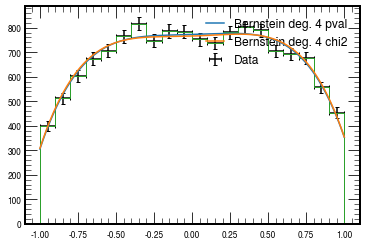

In [29]:
# making the plot that compares both models

fig = plt.figure(figsize=(7, 3.5), dpi=150)

# plot_tools.plot_model(data= binned_dataframe.cosThetaKMu.to_numpy(),
#                       pdf=models[best_deg], 
#                       bins=bins, density=True, 
#                       weights= binned_dataframe.totalW.to_numpy(),
#                      )
plot_tools.plot_models(data= binned_dataframe.cosThetaKMu.to_numpy(),
                      pdfs=[models[best_deg], best_model_test], 
                      label_names=['Bernstein deg. ' + str(best_deg) + ' pval', 'Bernstein deg. ' + str(best_deg_test) + ' chi2'],
                      bins=bins, density=True, 
                      weights= binned_dataframe.totalW.to_numpy(),
                     )

plt.hist(binned_dataframe.cosThetaKMu, bins=bins, range=[-1,1], weights= binned_dataframe.totalW.to_numpy(), histtype='step')
plt.legend(loc=1, prop={'size': 12})

plt.savefig(model_plot_path+'model_sample_'+str(best_deg)+'_vs_chisq_results_'+str(best_deg_test)+'_'+bin_name+'.png', dpi=300)

plt.show()

In [30]:
# exporting data

/home/carlos/scripts/plot_tools.py:904: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(weights=='none'):


'bernstein' object has no attribute 'models'


(array([398.86162134, 511.69842711, 604.42944336, 673.6188129 ,
        706.48582742, 765.23699822, 817.04684724, 747.69872269,
        786.65936565, 783.71263188, 752.89546986, 737.59226504,
        781.08310595, 801.56178735, 789.46990248, 704.66394237,
        692.29730722, 676.36622931, 556.71958139, 453.54177528]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 [<matplotlib.patches.Polygon at 0x7ffcbff5d280>])

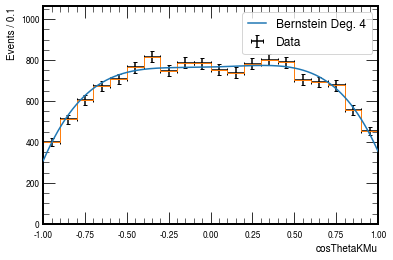

In [31]:
plot_tools.plot_model(data= binned_dataframe.cosThetaKMu.to_numpy(),
                      pdf=models_test[best_deg_test], 
                      bins=bins, density=True, 
                      weights= binned_dataframe.totalW.to_numpy(),
                     )
plt.hist(binned_dataframe.cosThetaKMu, bins=bins, range=[-1,1], weights= binned_dataframe.totalW.to_numpy(), histtype='step')
